In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd

In [2]:
!curl https://data.cityofnewyork.us/resource/4a9z-q7pu.json > dhsdailyy.json
url = "https://data.cityofnewyork.us/resource/4a9z-q7pu.json" 
df = pd.read_json(url)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11974    0 11974    0     0  63181      0 --:--:-- --:--:-- --:--:-- 63354


In [3]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mv1742/PUIDATA


In [4]:
# move the data
!mv dhsdailyy.json $PUIDATA

In [5]:
!ls $PUIDATA

dhsdaily.csv  dhsdailyy.json


In [6]:
#print the fist 8 lines out
df.head(8)

,infant_deaths,infant_mortality_rate,materal_race_or_ethnicity,neonatal_infant_deaths,neonatal_mortality_rate,number_of_live_births,postneonatal_infant_deaths,postneonatal_mortality_rate,year
0,287.0,9.8,Black Non-Hispanic,177.0,6.0,29268,110.0,3.8,2007
1,120.0,4.3,Other Hispanic,72.0,2.6,27621,48.0,1.7,2013
2,201.0,8.3,Black Non-Hispanic,132.0,5.5,24108,69.0,2.9,2013
3,125.0,3.3,White Non-Hispanic,82.0,2.1,38383,43.0,1.1,2008
4,259.0,9.5,Black Non-Hispanic,158.0,5.8,27405,101.0,3.7,2009
5,230.0,8.6,Black Non-Hispanic,148.0,5.6,26635,82.0,3.1,2010
6,104.0,2.8,White Non-Hispanic,75.0,2.0,37780,29.0,0.8,2010
7,210.0,8.1,Black Non-Hispanic,136.0,5.3,25825,74.0,2.9,2011


In [7]:
#look at the columns available, those are the variables
df.columns    

Index(['infant_deaths', 'infant_mortality_rate', 'materal_race_or_ethnicity',
       'neonatal_infant_deaths', 'neonatal_mortality_rate',
       'number_of_live_births', 'postneonatal_infant_deaths',
       'postneonatal_mortality_rate', 'year'],
      dtype='object')

In [8]:
#count how many rows, those are the data points
df.size

432

In [9]:
df_3c = df[['year', 'neonatal_mortality_rate', 'number_of_live_births']]

In [10]:
df_3c.rename(columns = {'year':'Year', 
               'neonatal_mortality_rate':'Neonatal Mortality Rate', 
               'number_of_live_births': 'Number of Live Births'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [11]:
df_3c.head(8)

,Year,Neonatal Mortality Rate,Number of Live Births
0,2007,6.0,29268
1,2013,2.6,27621
2,2013,5.5,24108
3,2008,2.1,38383
4,2009,5.8,27405
5,2010,5.6,26635
6,2010,2.0,37780
7,2011,5.3,25825


In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Figure 1')

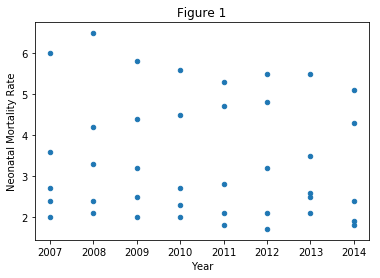

In [13]:
df_3c.plot(x='Year', y='Neonatal Mortality Rate', kind='scatter');
#ax.set_ylabel("R");
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)
plt.title('Figure 1', loc='center')

Figure 1: Plot showing the infant Deaths againts years for different ethnic populations